<a href="https://colab.research.google.com/github/apurwa2024/Apurwa_INFO5731_FaLL2024/blob/main/Bhattarai_Apurwa_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Step 1: Load your dataset (adjust path accordingly)
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_reviews.csv')

# Check the columns to verify the correct column name for text
print(df.columns)

# Step 2: Preprocess and convert the text into a TF-IDF matrix
# Use 'Clean_text' instead of 'text' since that's the correct column name in your dataset
documents = df['Clean_text'].values  # Adjust this to use 'Clean_text' instead of 'text'

# Define a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)

# Fit and transform the documents into a document-term matrix
dtm = vectorizer.fit_transform(documents)

# Step 3: Apply LDA for topic modeling
num_topics = 10  # Set the number of topics you want
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model on the document-term matrix
lda.fit(dtm)

# Step 4: Display the top 10 topics with the most important words
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Get the feature names (words) from the TF-IDF vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# Print the top words for each topic
print_top_words(lda, feature_names)

# Step 5: Assign topics to documents and summarize the topics
# Get the topic distribution for each document
doc_topic_dist = lda.transform(dtm)

# Get the top 3 topics for each document
top_topic_idx = doc_topic_dist.argmax(axis=1)

# Add the top topic to the dataframe
df['top_topic'] = top_topic_idx

# Display the top 10 topics (most frequent topics across the documents)
top_topics = df['top_topic'].value_counts().head(10)
print("Top 10 Topics (based on frequency in documents):")
print(top_topics)

# Step 6: Describe and summarize topics based on top words
print("\nTopic Summaries:")
for topic_idx in range(num_topics):
    top_words = [feature_names[i] for i in lda.components_[topic_idx].argsort()[:-11:-1]]
    print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")


Index(['document_id', 'Clean_text', 'Sentiment'], dtype='object')
Topic #1:
jacket

Topic #2:
jacket

Topic #3:
jacket

Topic #4:
jacket

Topic #5:
jacket

Topic #6:
jacket

Topic #7:
jacket

Topic #8:
jacket

Topic #9:
jacket

Topic #10:
jacket

Top 10 Topics (based on frequency in documents):
top_topic
0    10
Name: count, dtype: int64

Topic Summaries:
Topic #1: jacket
Topic #2: jacket
Topic #3: jacket
Topic #4: jacket
Topic #5: jacket
Topic #6: jacket
Topic #7: jacket
Topic #8: jacket
Topic #9: jacket
Topic #10: jacket


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load your dataset
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_reviews.csv')

# Step 2: Preprocess and split the data
X = df['Clean_text']
y = df['Sentiment']

# Check the class distribution
print("Class distribution:")
print(y.value_counts())

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.9, min_df=5)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Implement two supervised learning models
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)

# Step 5: Check the size of the smallest class to adjust the number of splits
min_class_size = min(y_train.value_counts())

# If the smallest class size is less than 5, we use 3-fold cross-validation
n_splits = 5 if min_class_size >= 5 else 3
print(f"Using {n_splits}-fold cross-validation.")

# Stratified K-Fold Cross-validation (adjusted)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation with stratified K-fold
lr_cv_score = cross_val_score(lr_model, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
svm_cv_score = cross_val_score(svm_model, X_train_tfidf, y_train, cv=skf, scoring='accuracy')

# Print cross-validation scores
print(f"Logistic Regression Cross-Validation Accuracy: {lr_cv_score.mean()}")
print(f"SVM Cross-Validation Accuracy: {svm_cv_score.mean()}")

# Step 6: Train the models and make predictions on the test set
lr_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)

lr_predictions = lr_model.predict(X_test_tfidf)
svm_predictions = svm_model.predict(X_test_tfidf)

# Step 7: Evaluate models on test set using accuracy, precision, recall, F1 score
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted')}")
    print(classification_report(y_true, y_pred))

# Evaluate Logistic Regression
evaluate_model(y_test, lr_predictions, "Logistic Regression")

# Evaluate SVM
evaluate_model(y_test, svm_predictions, "Support Vector Machine")


Class distribution:
Sentiment
neutral     4
positive    3
negative    3
Name: count, dtype: int64
Using 3-fold cross-validation.
Logistic Regression Cross-Validation Accuracy: 0.1111111111111111
SVM Cross-Validation Accuracy: 0.27777777777777773
Performance of Logistic Regression:
Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 Score: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Performance of Support Vector Machine:
Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 Score: 0.3333333333333333
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Missing values in the train dataset:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


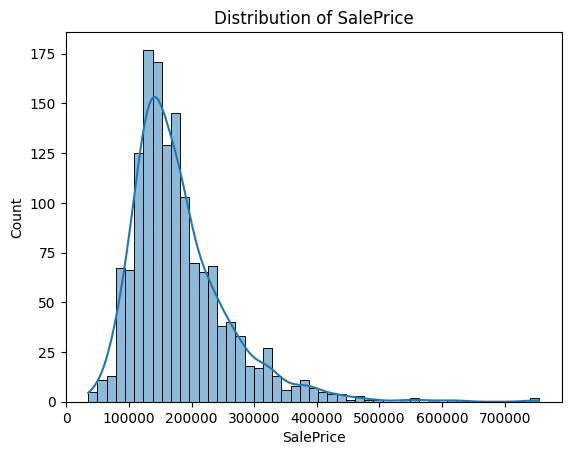

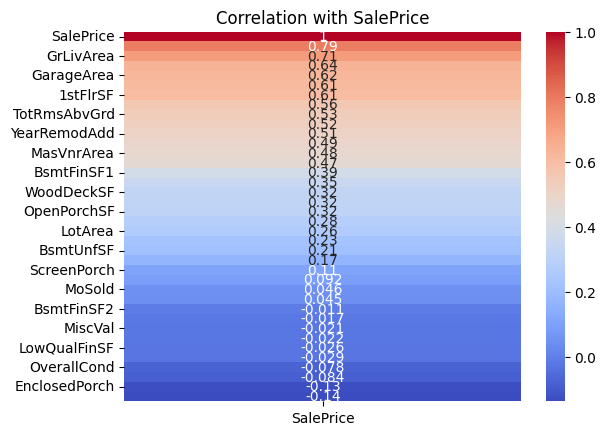

Mean Squared Error (MSE): 1608957994.2781196
Root Mean Squared Error (RMSE): 40111.818635884854
R² Score: 0.7902360407083444


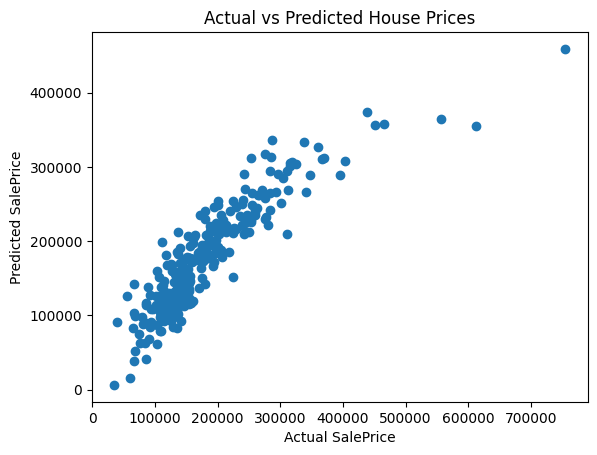

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

# EDA: Check for missing values
print("Missing values in the train dataset:")
print(train_data.isnull().sum())

# Visualize distribution of 'SalePrice'
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Select only numerical columns for correlation matrix
numerical_data = train_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap for features correlated with 'SalePrice'
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.show()

# Handling categorical variables: ExterCond and BsmtQual
# Create label encoders for these columns
label_encoder = LabelEncoder()

# Encode 'ExterCond' and 'BsmtQual' as they are categorical features
train_data['ExterCond'] = label_encoder.fit_transform(train_data['ExterCond'].fillna('Missing'))
train_data['BsmtQual'] = label_encoder.fit_transform(train_data['BsmtQual'].fillna('Missing'))

# Select relevant features (including the encoded categorical ones)
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'ExterCond', 'BsmtQual']
X = train_data[selected_features]
y = train_data['SalePrice']

# Step 3: Data Cleaning
# Handling missing values for selected features (impute numerical features)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Feature scaling to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

# Visualize Actual vs Predicted house prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted House Prices')
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [18]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_reviews.csv')

# Check the columns to ensure correct column names
print(data.columns)

# Set the correct column names for text and labels
text_column = 'Clean_text'
label_column = 'Sentiment'

# Check for missing values in the 'Sentiment' column
print("Missing values in the 'Sentiment' column:")
print(data[label_column].isnull().sum())

# Ensure no NaN values in the 'Sentiment' column and convert it to numeric labels
data[label_column] = data[label_column].map({'POSITIVE': 1, 'NEGATIVE': 0})

# Drop rows where 'Sentiment' has missing values after mapping
data = data.dropna(subset=[label_column])

# Initialize the Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Perform sentiment analysis on the text data in the dataset
predictions = []
for text in data[text_column]:  # Iterate over the text data column
    result = sentiment_analyzer(text)[0]  # Get the prediction result
    predictions.append(result['label'])

# Map the string labels (e.g., 'POSITIVE', 'NEGATIVE') to numerical values
label_map = {'POSITIVE': 1, 'NEGATIVE': 0}
predictions = [label_map[label] for label in predictions]

# Ensure ground truth labels are numeric (if they are not already)
y_true = data[label_column]

# Check for any NaN values in y_true or predictions before evaluating
print(f"NaN values in y_true: {y_true.isnull().sum()}")
print(f"NaN values in predictions: {any(pd.isna(predictions))}")

# Evaluate the performance of the model using ground truth labels
accuracy = accuracy_score(y_true, predictions)
precision = precision_score(y_true, predictions)
recall = recall_score(y_true, predictions)
f1 = f1_score(y_true, predictions)

# Output the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Index(['document_id', 'Clean_text', 'Sentiment'], dtype='object')
Missing values in the 'Sentiment' column:
0
NaN values in y_true: 0
NaN values in predictions: False
Accuracy: nan
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 